In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import datetime
%matplotlib inline

In [66]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Live-Time-Series/main/airline_passengers.csv')

In [67]:
df.dtypes

Month                       object
Thousands of Passengers    float64
dtype: object

In [68]:
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [69]:
df.dropna(inplace=True)

In [70]:
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [71]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [73]:
df['Month']=pd.to_datetime(df['Month'])

In [76]:
#change the datatype of month column to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [77]:
df.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [78]:
df.tail()

,Month,Thousands of Passengers
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [79]:
#change month column to index 
df.set_index('Month',inplace=True)

In [80]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

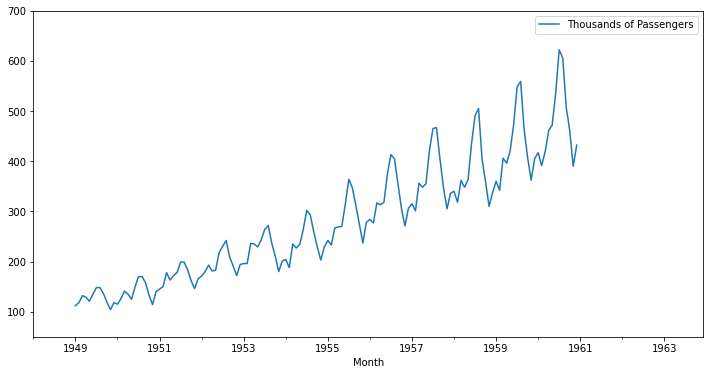

In [81]:
df.plot(xlim=['1948-01-01','1963-12-01'],ylim=[50,700],figsize=(12,6))

In [82]:
from statsmodels.tsa.stattools import adfuller

In [84]:
#We need to convert the data to stationary for arimax or sarimax model can be checked using dickey-fuller test when p<=0.05
def find_p(series):
    result  = adfuller(series)
    print(f'ADF statistics :{result[0]}')
    print(f'p - value :{result[1]}')
    if result[1]<=0.05:
        print('Strong evidence in null hypothesis, rejected null hypothesis and data is stationary')
    else:
        print('Weak evidence in null hypothesis, Accepted null hypothesis and data is not stationary')

In [85]:
find_p(df['Thousands of Passengers'])

ADF statistics :0.8153688792060543
p - value :0.9918802434376411
Weak evidence in null hypothesis, Accepted null hypothesis and data is not stationary


In [86]:
#first difference
df['first difference'] = df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)

In [87]:
find_p(df['first difference'].dropna())

ADF statistics :-2.8292668241700034
p - value :0.054213290283824954
Weak evidence in null hypothesis, Accepted null hypothesis and data is not stationary


In [88]:
#second difference
df['second difference'] = df['first difference']-df['first difference'].shift(1)

In [90]:
find_p(df['second difference'].dropna())

ADF statistics :-16.384231542468488
p - value :2.7328918500143186e-29
Strong evidence in null hypothesis, rejected null hypothesis and data is stationary


In [91]:
#seasonal data 
df['12 difference'] = df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)

In [93]:
find_p(df['12 difference'].dropna())

ADF statistics :-3.3830207264924805
p - value :0.011551493085514982
Strong evidence in null hypothesis, rejected null hypothesis and data is stationary


<AxesSubplot:xlabel='Month'>

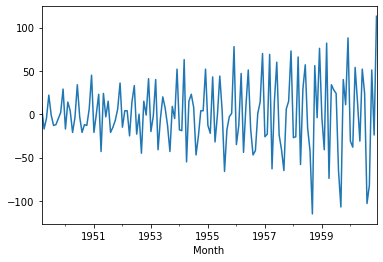

In [96]:
#p value for second difference is <=0.05 which means data is stationary
df['second difference'].dropna().plot()

In [97]:
df

,Thousands of Passengers,first difference,second difference,12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [98]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

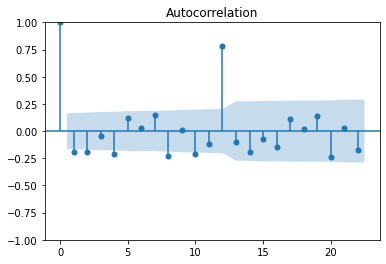

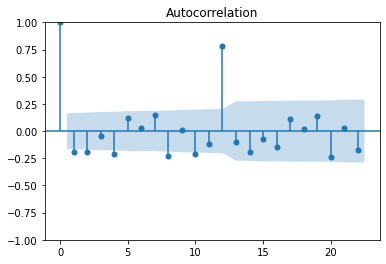

In [99]:
#acf grap to find out the q values(moving average) for Arimax model
acf = plot_acf(df['second difference'].dropna())
acf

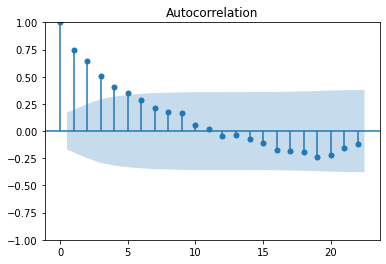

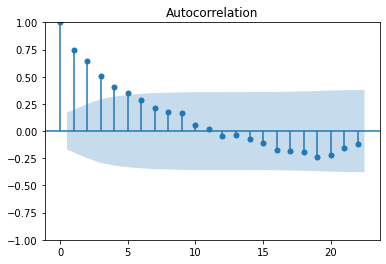

In [100]:
#acf grap to find out the q values(moving average) for Arimax model
acf = plot_acf(df['12 difference'].dropna())
acf

C:\Users\91986\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


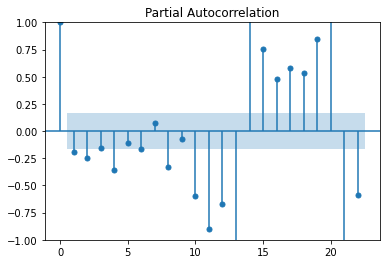

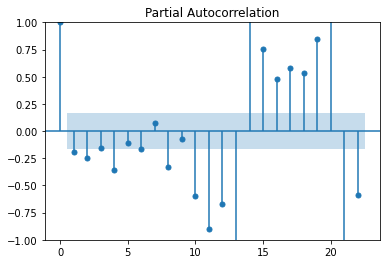

In [101]:
#pacf grap to find out the p values for Arimax model
pacf = plot_pacf(df['second difference'].dropna())
pacf

C:\Users\91986\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


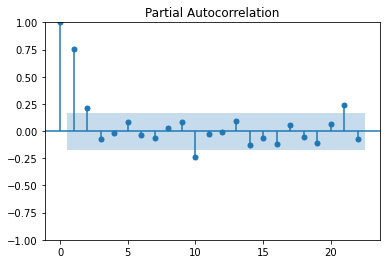

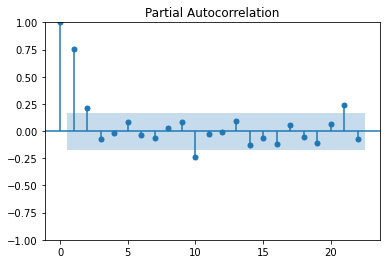

In [102]:
#pacf grap to find out the p values for Arimax model
pacf = plot_pacf(df['12 difference'].dropna())
pacf

In [103]:
from datetime import datetime , timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [104]:
train_data = df[:train_dataset_end]
test_data = df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [105]:
train_data

,Thousands of Passengers,first difference,second difference,12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [106]:
test_data

,Thousands of Passengers,first difference,second difference,12 difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [107]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

C:\Users\91986\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


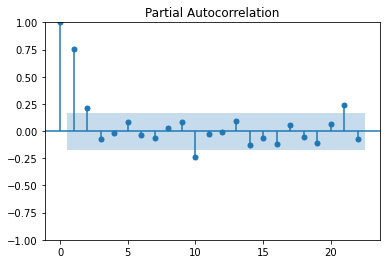

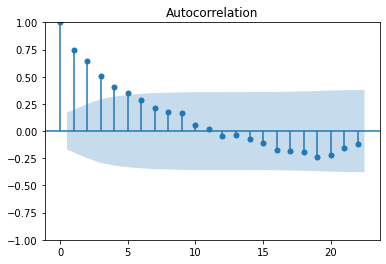

In [108]:
#pacf grap to find out the p values for Arimax model
pacf = plot_pacf(df['12 difference'].dropna())
acf = plot_acf(df['12 difference'].dropna())

In [109]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [110]:
model = SARIMAX(train_data['Thousands of Passengers'], order=(3, 0, 5), seasonal_order=(0, 1, 0, 12))
model_fit = model.fit()

C:\Users\91986\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91986\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91986\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [111]:
pred = model_fit.predict(start=datetime(1949,12,1),end=datetime(1960,12,1))
residuals = test_data['Thousands of Passengers']-pred

In [112]:
residuals

1949-12-01           NaN
1950-01-01           NaN
1950-02-01           NaN
1950-03-01           NaN
1950-04-01           NaN
                 ...    
1960-08-01    145.754411
1960-09-01     85.167128
1960-10-01     79.354588
1960-11-01     47.723706
1960-12-01     51.698564
Length: 133, dtype: float64

In [113]:
pred

1949-12-01      1.126295
1950-01-01    113.205601
1950-02-01    120.873461
1950-03-01    138.590689
1950-04-01    137.562629
                 ...    
1960-08-01    460.245589
1960-09-01    422.832872
1960-10-01    381.645412
1960-11-01    342.276294
1960-12-01    380.301436
Freq: MS, Name: predicted_mean, Length: 133, dtype: float64

In [114]:
df['Thousands of Passengers']

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: Thousands of Passengers, Length: 144, dtype: float64

In [115]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Mon, 09 Jan 2023   AIC                            548.481
Time:                                     11:03:14   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5984      0.937      0.638      0.523      -1.239       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4526      0.894     -0.507      0.613      -2.204       1.299
ma.L1          0.1837      1.164      0.158      0.875      -2.097       2.465
ma.L2         -0.5342      1.262     -0.423      0.672      -3.007       1.938
ma.L3         -0.0986      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1272      0.337     -0.377      0.706      -0.788       0.534
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7321     81.097      1.082      0.279     -71.214     246.679
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
test_data.tail()

,Thousands of Passengers,first difference,second difference,12 difference
Month,,,,
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0
1960-11-01,390.0,-71.0,-24.0,28.0
1960-12-01,432.0,42.0,113.0,27.0


In [117]:
df['predicted_sarima']=pred

In [118]:
df

,Thousands of Passengers,first difference,second difference,12 difference,predicted_sarima
Month,,,,,
1949-01-01,112.0,NaN,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN,NaN
1949-04-01,129.0,-3.0,-17.0,NaN,NaN
1949-05-01,121.0,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0,460.245589
1960-09-01,508.0,-98.0,-82.0,45.0,422.832872
1960-10-01,461.0,-47.0,51.0,54.0,381.645412


<AxesSubplot:xlabel='Month'>

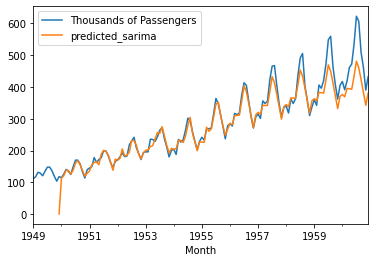

In [119]:
df[['Thousands of Passengers','predicted_sarima']].plot()